# 1. PyKoSpacing

In [1]:
# pip install git+https://github.com/haven-jeon/PyKoSpacing.git

sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'
new_sent = sent.replace(" ", '') # 띄어쓰기가 없는 문장 임의로 만들기
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


In [4]:
from pykospacing import Spacing

spacing = Spacing()
kospacing_sent = spacing(new_sent)

print(sent)
print(kospacing_sent)
print(sent == kospacing_sent)

김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
True


# 2. Py-Hanspell

In [6]:
# pip install git+https://github.com/ssut/py-hanspell.git

from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(sent)
print(hanspell_sent)

맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 
맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지 


In [14]:
spelled_sent = spell_checker.check(new_sent)

sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'
print('orginal : ', sent)
print('without whitespace  : ', new_sent)
print('PyKoSpacing : ', spacing(new_sent))
print('Py-Hanspell : ', spelled_sent.checked)

orginal :  김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
without whitespace  :  김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.
PyKoSpacing :  김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
Py-Hanspell :  김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.


# 3. SOYNLP를 이용한 단어 토큰화

In [15]:
# pip install soynlp

## 1. 신조어 문제


In [16]:
from konlpy.tag import Okt

tokenizer = Okt()
print(tokenizer.morphs('에이비식스 이대휘 1월 최애돌 기부 요청'))

['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요청']


## 2. 학습하기

In [18]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [19]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", 
                           filename="2016-10-20.txt")
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

In [1]:
# for _ in range(3):
#   for doc in corpus:
#     if len(doc) > 0:
#       print(doc)

In [21]:
word_extractor = WordExtractor()
word_extractor.train(corpus) # 응집 확률과 브랜칭 엔트로피 단어 점수표를 만드는 과정
word_score_table = word_extractor.extract()

training was done. used memory 1.183 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


## 3. SOYNLP의 응집 확률 (cohesion probability)
- 응집확률 : 내부 문자열이 얼마나 응집하여 자주 등장하는지를 판단하는 척도
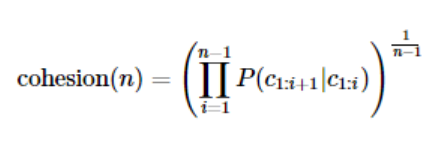
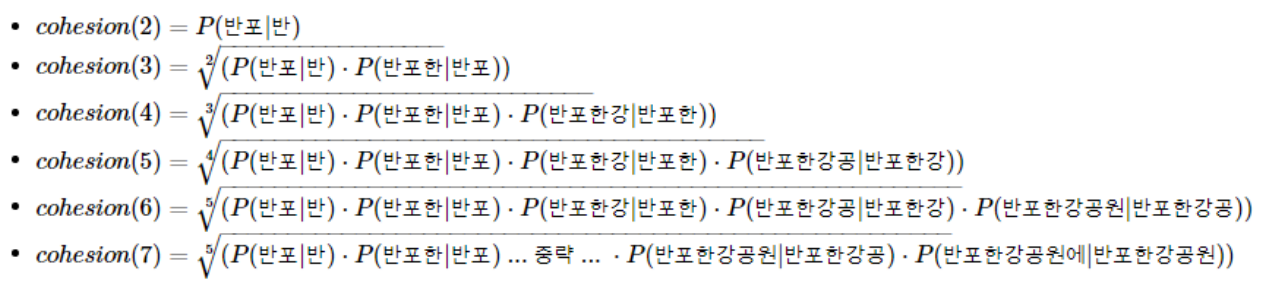

In [39]:
test_word = "반포한강공원에"

for i in range(2, len(test_word)):
  print(f"{test_word[:i+1]} , {word_score_table[test_word[:i+1]].cohesion_forward}")

반포한 , 0.08838002913645132
반포한강 , 0.19841268168224552
반포한강공 , 0.2972877884078849
반포한강공원 , 0.37891487632839754
반포한강공원에 , 0.33492963377557666


## 4. SOYNLP의 브랜칭 엔트로피(branching entropy)
- 확률 분포의 엔트로피값을 사용
- 주어진 문자열에서 얼마나 다음 문자가 등장할 수 있는지를 판단하는 척도
- 문자 시퀀스에서 다음 문자 예측을 위해 헷갈리는 정도로 비유 가능
- 완성된 단어에 가까워질수록 문맥으로 인해 점점 정확히 예측할 수 있게 되면서 줄어드는 양상

In [41]:
test_word = "디스플레이"

for i in range(1, len(test_word)):
  print(f"{test_word[:i+1]} , {word_score_table[test_word[:i+1]].right_branching_entropy}")

디스 , 1.6371694761537934
디스플 , -0.0
디스플레 , -0.0
디스플레이 , 3.1400392861792916


## 5. SOYNLP의 L tokenizer
- 분리 기준을 응집확률(cohesion_forward probability)점수가 가장 높은 L토큰을 찾아내는 원리

In [43]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

## 6. 최대 점수 토크나이저
- 띄어쓰기가 되지 않은 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저

In [44]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를 척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

##  7. SOYNLP를 이용한 반복되는 문자 정제

In [48]:
from soynlp.normalizer import *

print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ


In [46]:
print(repeat_normalize('와하하하하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하핫', num_repeats=2))

와하하핫
와하하핫
와하하핫


## 8.Customized Konlpy

In [52]:
from ckonlpy.tag import Twitter

twitter = Twitter()
twitter.morphs("은경이는 사무실로 갔습니다.")

['은', '경이', '는', '사무실', '로', '갔습니다', '.']

In [53]:
twitter.add_dictionary('은경이', 'Noun')

In [54]:
twitter.morphs('은경이는 사무실로 갔습니다.')

['은경이', '는', '사무실', '로', '갔습니다', '.']